### In Depth: Linear Regression

• Just as naive Bayes (discussed earlier in In Depth: Naive Bayes Classification) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.

• Such models are popular because they can be fit very quickly, and are very interpretable.

• You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

• In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

• We begin with the standard imports:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Simple Linear Regression

• We will start with the most familiar linear regression, a straight-line fit to data.

• A straight-line fit is a model of the form
                            
                       y=ax+b

• Where $a$ is commonly known as the slope, and $b$ is commonly known as the intercept.

• Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

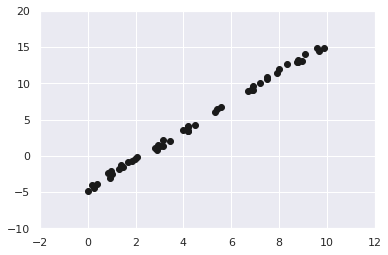

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y, marker = 'o', color = 'k')
plt.xlim(-2, 12)
plt.ylim(-10, 20);

• We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

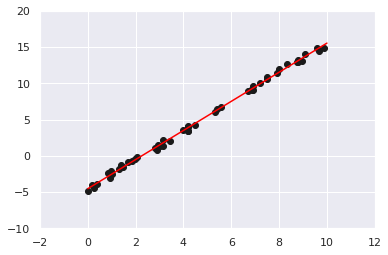

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, marker='o', color = 'k')
plt.plot(xfit, yfit, color = 'red')

plt.xlim(-2, 12)
plt.ylim(-10, 20);

• The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.

• Here the relevant parameters are coef_ and intercept_:

In [21]:
print("Model Slope: ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model Slope:  2.0082302432277497
Model Intercept:  -4.533652972099125


### We see that the results are very close to the inputs, as we might hope.

• The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
       
                       y=a0+a1x1+a2x2+⋯
       
• Where there are multiple $x$ values.

• Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

• The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator: